#**Université Paris Saclay**
#**Université d’Evry Val d’Essonne**
##**Matser Innovation,Marchés et Science des Donnnées**
##**Projet TIME SERIES** 
#Guy Patrick KOUAMALA
#Stéphane MONNOT

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
!pip install arch
!pip install statsmodels --upgradeµ
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.api import VAR


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 727kB 3.4MB/s 

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgradeµ


#Exercice 1:

In [0]:
from google.colab import files
uploaded = files.upload()

Saving coint.xlsx to coint.xlsx


In [0]:
import io
data = pd.read_excel(io.BytesIO(uploaded['coint.xlsx']))

data=data.drop(['Unnamed: 0' ] , axis=1)

In [0]:
data.head(10)

,YEAR,QTR,INTDIFF,lrexr,lusprod,lusdisrat,ldisrat,ltot,t
0,1973,Q1,-4.12,-2.729751,-7.637016,-0.203091,-0.249499,0.069258,1
1,1973,Q2,-5.03,-2.714500,-7.662765,-0.208354,-0.270588,0.028988,2
2,1973,Q3,-4.42,-2.677293,-7.684658,-0.211150,-0.293954,0.016155,3
3,1973,Q4,-2.39,-2.755821,-7.680526,-0.222508,-0.290191,-0.021842,4
4,1974,Q1,-3.95,-2.754249,-7.693607,-0.207661,-0.301817,-0.172650,5
5,1974,Q2,-4.19,-2.769823,-7.708230,-0.197851,-0.296611,-0.204095,6
6,1974,Q3,-5.97,-2.760691,-7.731320,-0.189572,-0.286624,-0.192500,7
7,1974,Q4,-8.49,-2.711355,-7.720378,-0.192881,-0.270478,-0.152394,8
8,1975,Q1,-7.57,-2.667373,-7.695838,-0.168988,-0.271698,-0.130906,9
9,1975,Q2,-6.18,-2.659680,-7.707747,-0.166694,-0.266567,-0.127085,10


In [0]:
data.shape

(100, 9)

#Question 1: Tracage des series et statistiques de descriptives pertinentes

In [0]:
data.describe(  )

,YEAR,INTDIFF,lrexr,lusprod,lusdisrat,ldisrat,ltot,t
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1985.000000,-0.858100,-2.721546,-7.664400,-0.168553,-0.245174,-0.072157,50.500000
std,7.247431,3.363828,0.149617,0.042978,0.029241,0.024450,0.102513,29.011492
min,1973.000000,-9.540000,-3.081462,-7.766881,-0.222508,-0.310420,-0.257108,1.000000
25%,1979.000000,-3.615000,-2.802344,-7.694826,-0.189698,-0.259767,-0.179507,25.750000
50%,1985.000000,-0.260000,-2.709791,-7.658782,-0.173460,-0.236476,-0.055944,50.500000
75%,1991.000000,1.782500,-2.627959,-7.632859,-0.143534,-0.229925,0.029763,75.250000
max,1997.000000,5.890000,-2.407055,-7.583070,-0.110350,-0.208344,0.085942,100.000000


In [0]:
dat=data.drop(['QTR','t', 'YEAR' ] , axis=1)
y=data.YEAR

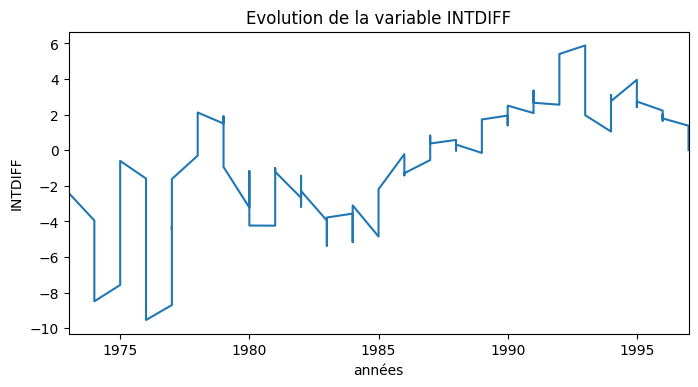

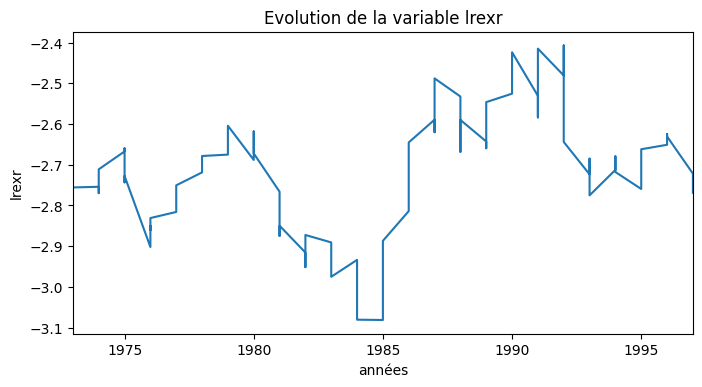

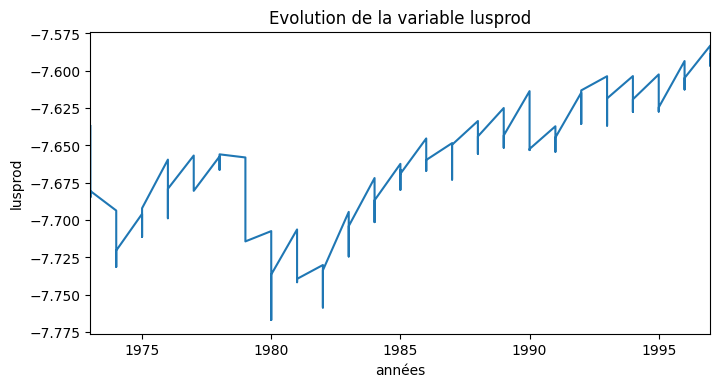

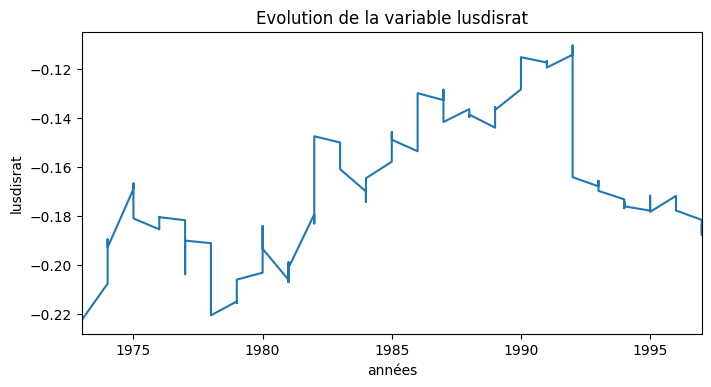

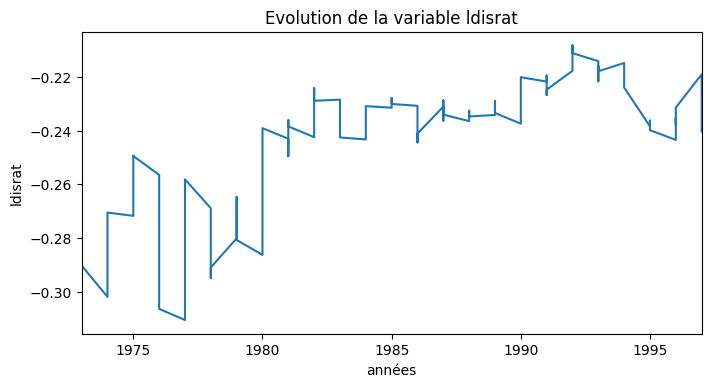

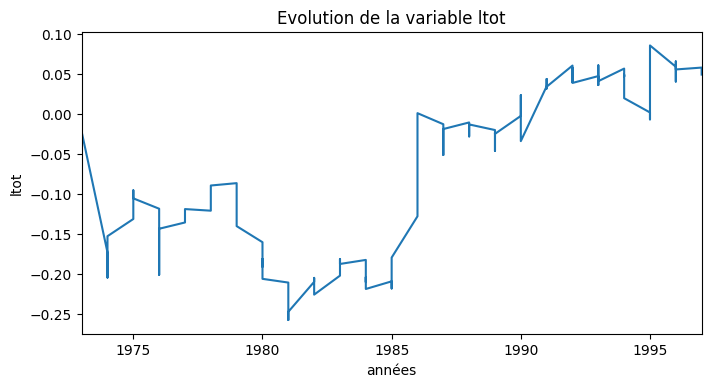

In [0]:
for i in dat.columns:
  plt.figure( figsize=(8,4), dpi= 100)
  plt.plot(y,dat[i])
  plt.gca().set(title= "Evolution de la variable " + i )
  plt.xlabel('années', size=10)
  plt.ylabel( i , size=10)
  plt.xlim(1973, 1997)
  plt.show()


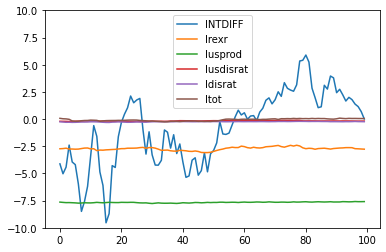

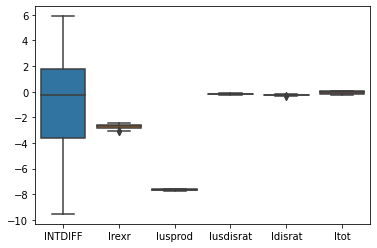

In [0]:
fig, ax = plt.subplots()
for nm in  dat.columns :
    ax.plot( dat[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.set_ylim(-10, 10)
    ax.legend()

plt.show( )


#sns.boxplot(data=dat.drop ( ['INTDIFF'] , axis=1 ));
sns.boxplot(data=dat);

1997 1973 25
100


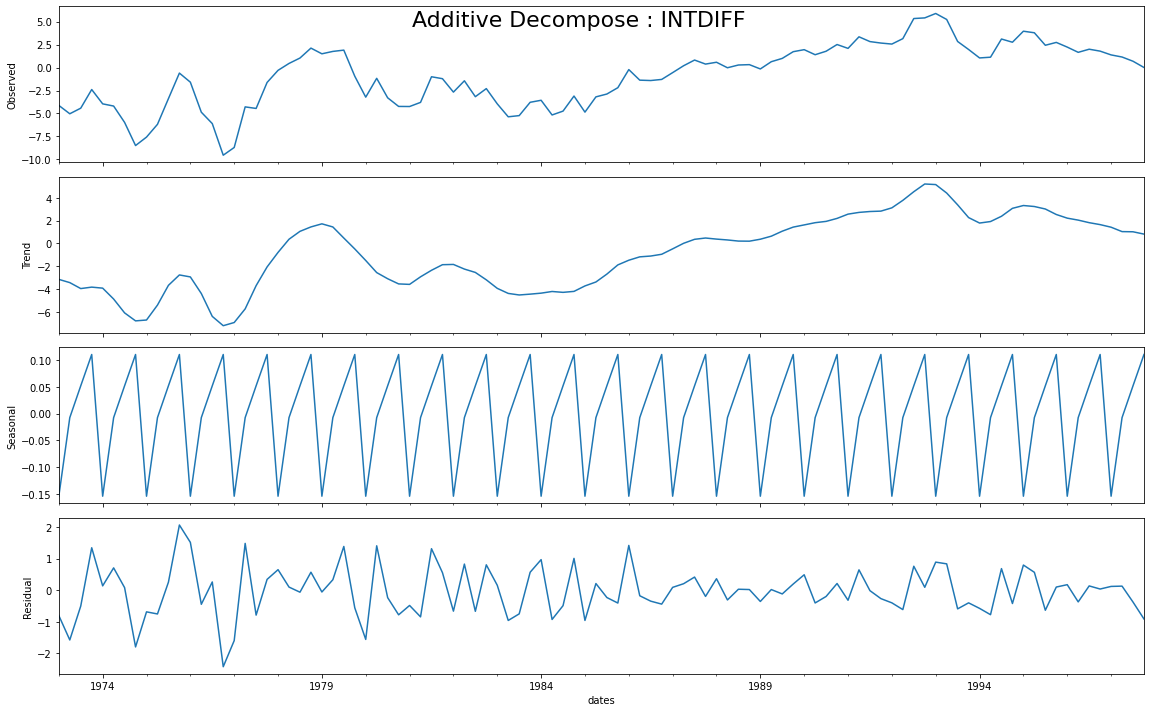

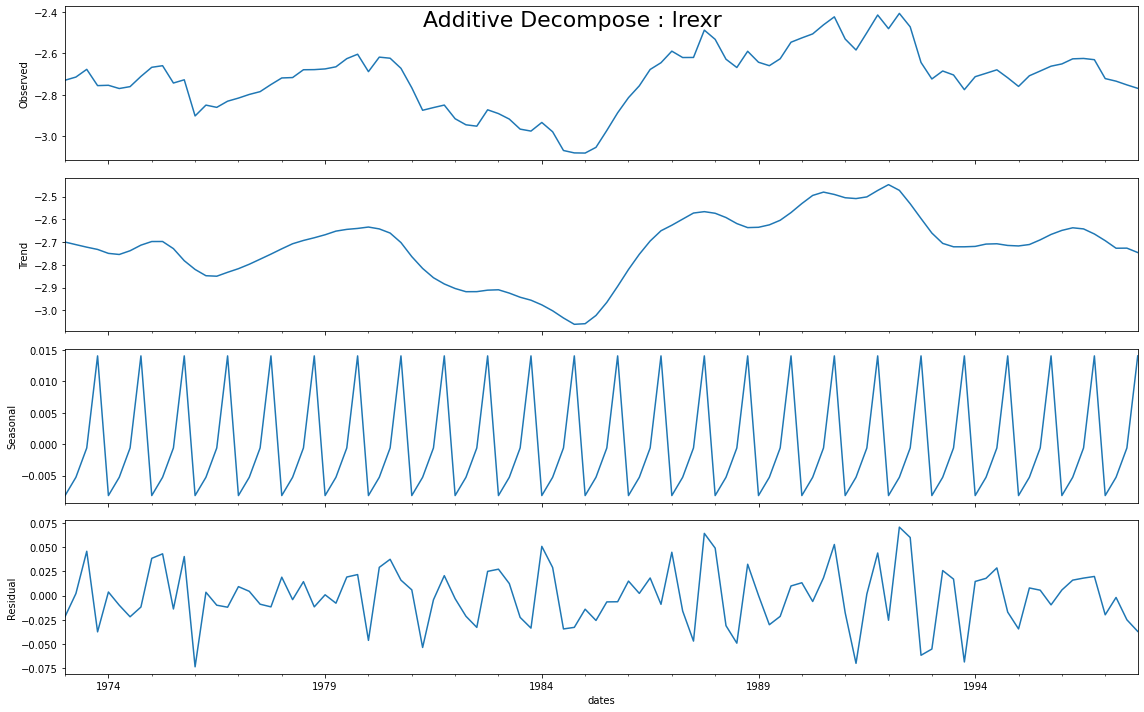

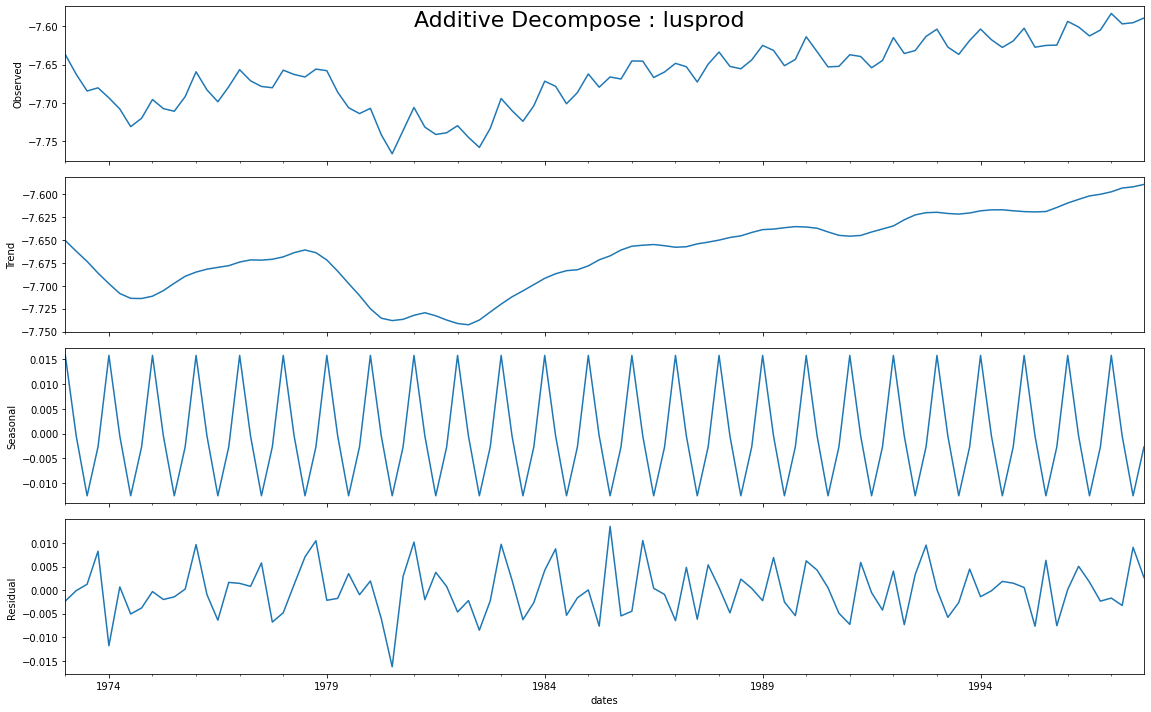

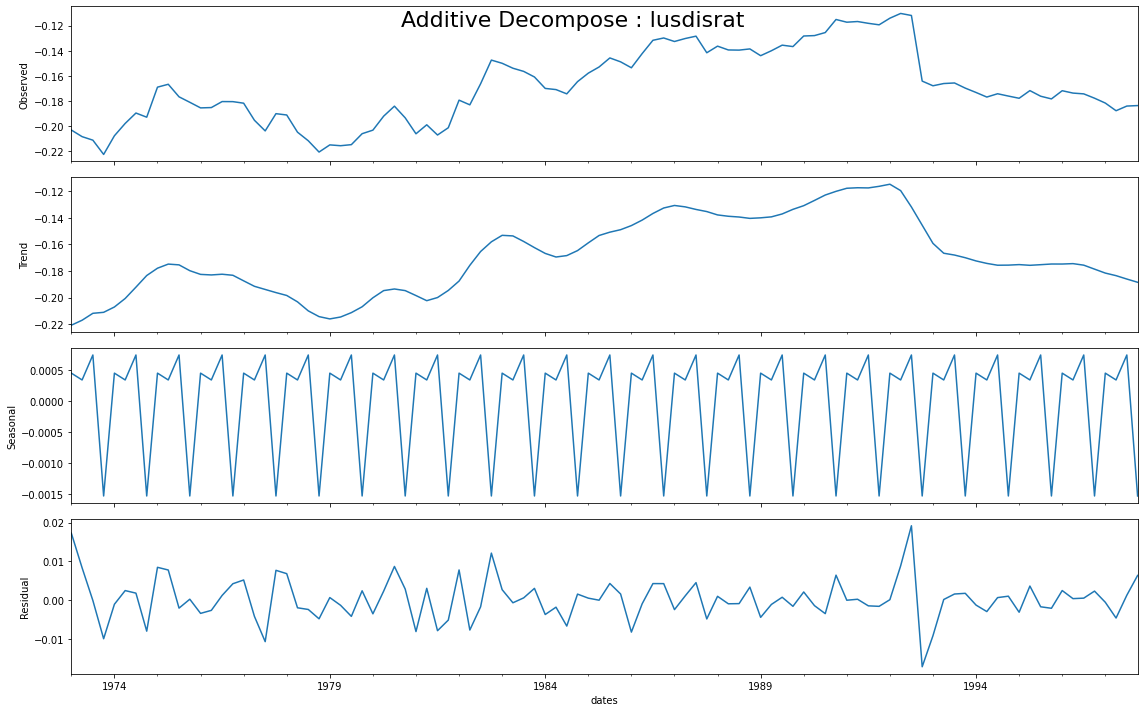

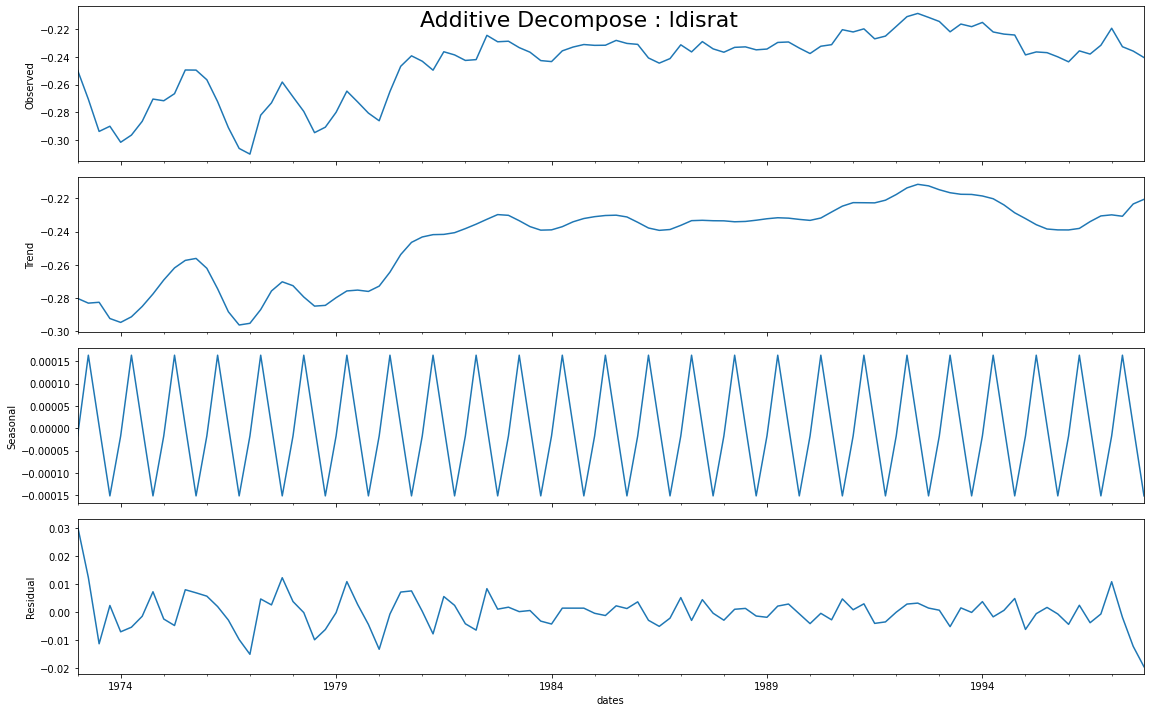

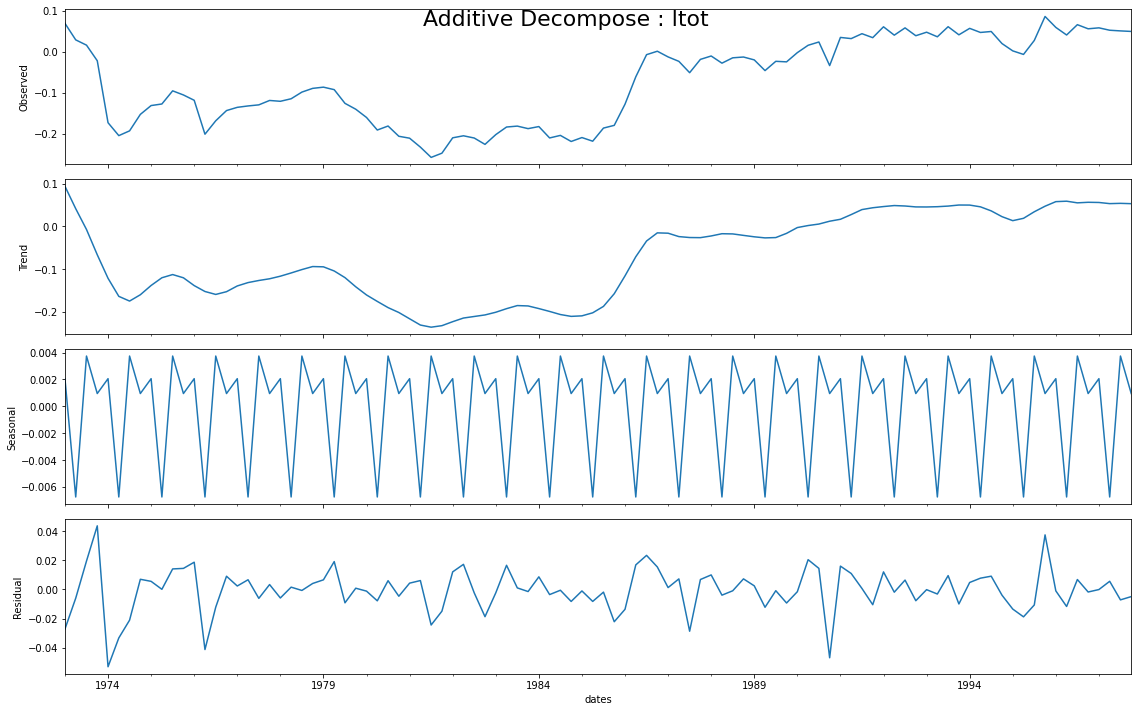

In [0]:
#ce code n'est pas important mais ne pas effacer

## Décomposition de la série chronologique en ses différentes composantes

from statsmodels.tsa.seasonal import seasonal_decompose

# rmq : Multiplicative seasonality is not appropriate for zero and negative values => du coup on utilisera uniquement additive ( si on à le choix, on choisi la méthode qui laisse le moins possible de modèle ds les résidu )


## On génère un index date 

print ( data.YEAR.max() , data.YEAR.min() , data.YEAR.max() -  data.YEAR.min() + 1 ) # date max == 1997  et  date min == 1973   => soit 25 ans
print (  len (  pd.date_range( start = '1/1/1973' ,  end='1/1/1998',  freq='3M')  )  ) 

data_2 = data
data_2["dates"] = pd.date_range( start = '1/1/1973' ,  end='1/1/1998',  freq='3M')
data_2.set_index('dates', inplace = True )



for i in  [ "INTDIFF" , 	"lrexr" , "lusprod" , "lusdisrat" , "ldisrat" , "ltot" ] :

  # Additive Decomposition
  result_add = seasonal_decompose( data_2[ i ], model='additive', extrapolate_trend='freq')

  # Multiplicative Decomposition 
  #result_mul = seasonal_decompose(data_2['lusdisrat'], model='multiplicative', extrapolate_trend='freq')

  # Plot
  plt.rcParams.update({'figure.figsize': ( 16,10)})
  #result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
  result_add.plot().suptitle('Additive Decompose : ' +  i  , fontsize=22)
  plt.show()




##possibilité d'extraire les différentes valeurs de la décomposition (ici se fait sur la dernière col de la boucle uniquement )
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
# df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
# df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
# df_reconstructed.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


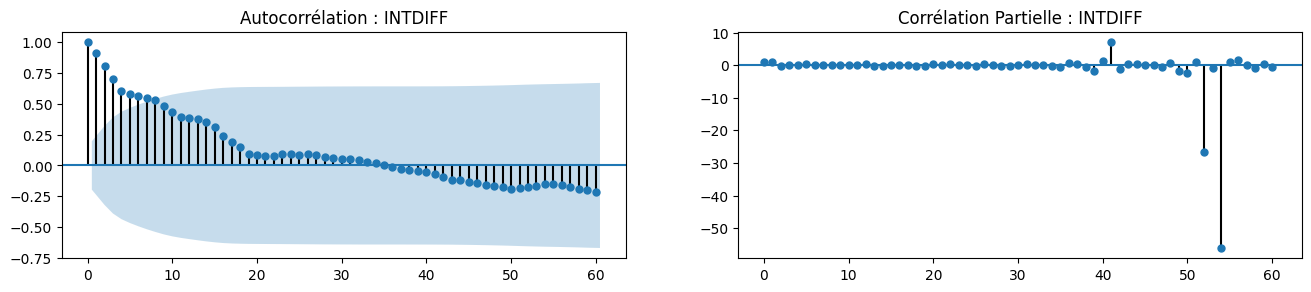

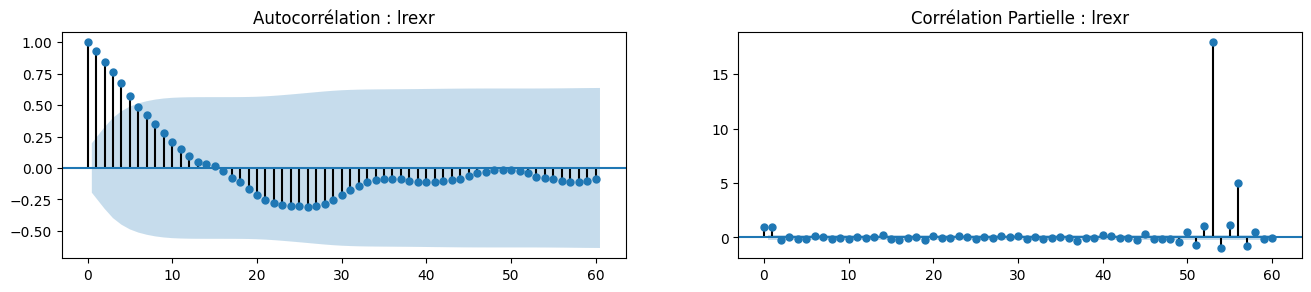

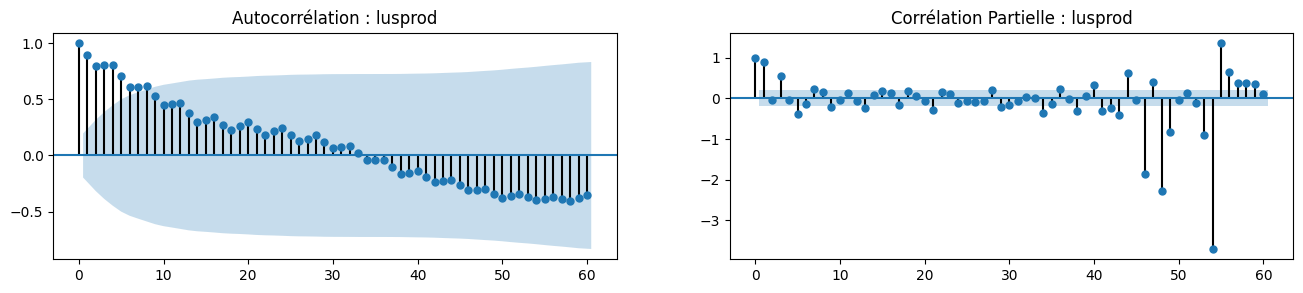

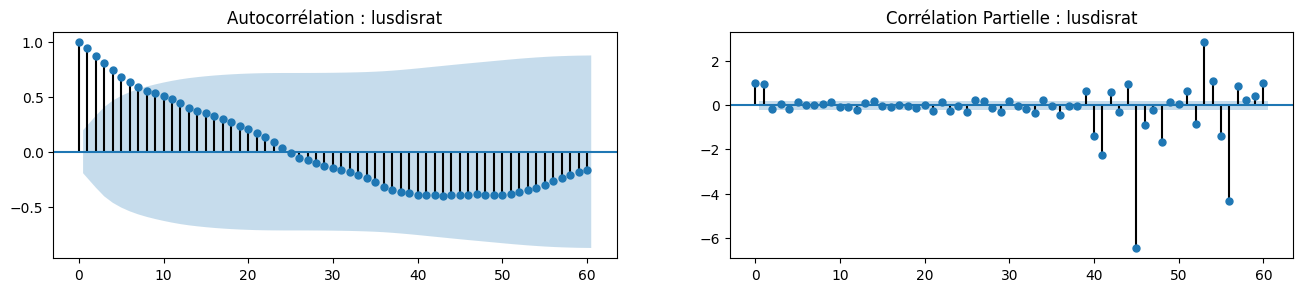

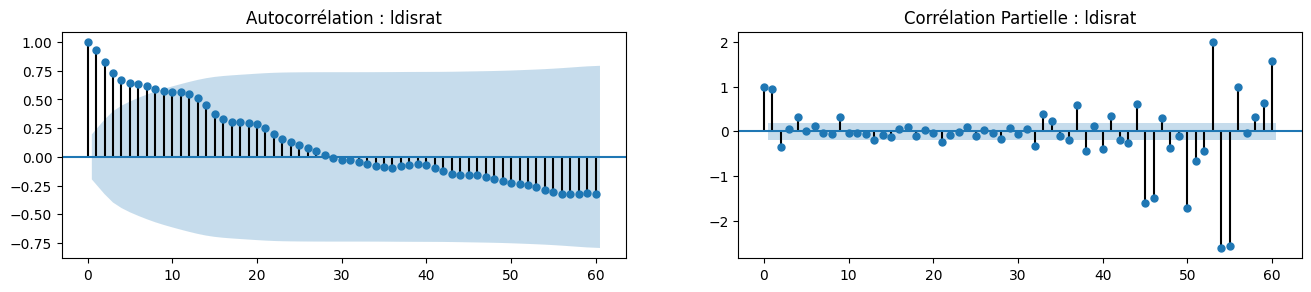

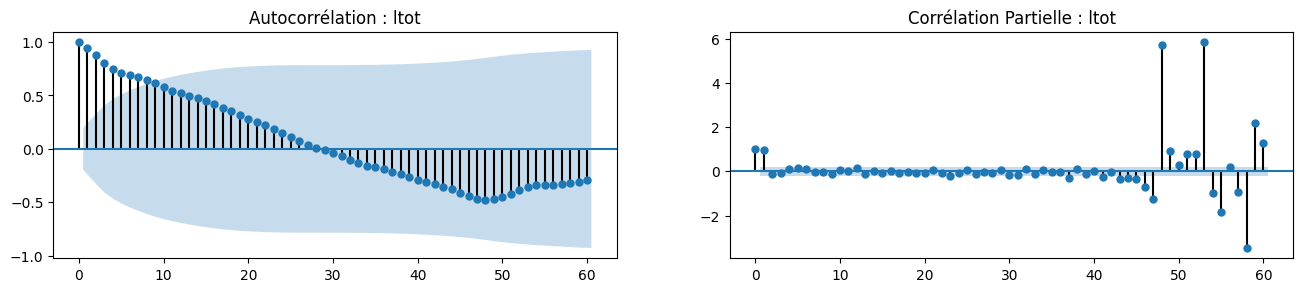

In [0]:
# fonctions d'autocorrélation et d'autocorrélation partielle

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

for i in  [ "INTDIFF" , 	"lrexr" , "lusprod" , "lusdisrat" , "ldisrat" , "ltot" ] :
  # Draw Plot
  fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
  plot_acf( data_2[ i ].tolist(), lags=60, ax=axes[0]  , title= "Autocorrélation : " + i )
  plot_pacf( data_2[ i ].tolist(), lags=60, ax=axes[1] , title= "Corrélation Partielle : " + i)

#Question2: Type de non stationnarité et conclusion

##Modèle 3 (modèle avec constante et trend)

In [0]:
from arch.unitroot import ADF
for i in dat.columns: 
  adf = ADF(dat[i])
  adf.lags = 4
  adf.trend = 'ct'
  print("****************************************************************************************ADF pour la variable", i)
  print( "            "  , i)
  print(adf.summary().as_text())
  reg_res = adf.regression
  print( "                                 "  , i)
  print(reg_res.summary().as_text())

****************************************************************************************ADF pour la variable INTDIFF
             INTDIFF
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.307
P-value                         0.430
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.06 (1%), -3.46 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                                  INTDIFF
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     5.435
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           8.07e-05
Time:                        15:07

##modèle2 (avec constante et sans trend)

In [0]:
from arch.unitroot import ADF
for i in dat.columns: 
  adf = ADF(dat[i])
  adf.lags = 4
  print("****************************************************************************************ADF pour la variable", i)
  print( "            "  , i)
  print(adf.summary().as_text() )
  reg_res = adf.regression
  print( "                                 "  , i)
  print(reg_res.summary().as_text())



****************************************************************************************ADF pour la variable INTDIFF
             INTDIFF
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.592
P-value                         0.487
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                                  INTDIFF
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     5.821
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           0.000107
Time:                        15:15:52   Log-Likelihood: 

#Modèle 1 :Test de racine unitaire pour les series




In [0]:
variable = [ ]
Statistique_test = []
seuil_1 = []
seuil_5 = []
seuil_10 = []
Conclusion = []

for i in dat.columns:
  modele1=sm.tsa.stattools.adfuller(dat[i], maxlag=4, regression='nc', autolag='AIC', store=False, regresults=False)
  print('Statistique du test ADF:', modele1[:1])
  print(modele1[4])

  variable.append ( i )
  Statistique_test.append ( modele1[:1][0] )
  seuil_1.append (modele1[4]['1%'] )
  seuil_5.append (modele1[4]['5%'] )
  seuil_10.append (modele1[4]['10%'] )


  if modele1[4]['5%']< modele1[:1]:
    print ("on constate que le t calculé est supérieur a la valeur critique au seuil de 5%, A la saerie ", i, "est non stationnaire sans trend sans constante")
    Conclusion.append ( "t supérieur à la valeur critique au seuil de 5%")
  else: 
      print ("on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, A la saerie ", i, "est  stationnaire sans trend sans constante")
      Conclusion.append ( "t inferieur à la valeur critique au seuil de 5%")






result = pd.DataFrame( { "variable" : variable , "Statistique_test" : Statistique_test , 
                      "seuil_1%" : seuil_1 , "seuil_5%" : seuil_5 , "seuil_10%" : seuil_10 ,
                      "Conclusion" : Conclusion } ) 

result

Statistique du test ADF: (-1.6829861695897823,)
{'1%': -2.589676620498615, '5%': -1.9441638046362444, '10%': -1.6142953474267385}
on constate que le t calculé est supérieur a la valeur critique au seuil de 5%, A la saerie  INTDIFF est non stationnaire sans trend sans constante
Statistique du test ADF: (-0.03239386328599265,)
{'1%': -2.5886939026629934, '5%': -1.9440242848853808, '10%': -1.6143879418406077}
on constate que le t calculé est supérieur a la valeur critique au seuil de 5%, A la saerie  lrexr est non stationnaire sans trend sans constante
Statistique du test ADF: (-1.0425580417353035,)
{'1%': -2.589676620498615, '5%': -1.9441638046362444, '10%': -1.6142953474267385}
on constate que le t calculé est supérieur a la valeur critique au seuil de 5%, A la saerie  lusprod est non stationnaire sans trend sans constante
Statistique du test ADF: (-0.5058741647305902,)
{'1%': -2.5886939026629934, '5%': -1.9440242848853808, '10%': -1.6143879418406077}
on constate que le t calculé est su

,variable,Statistique_test,seuil_1%,seuil_5%,seuil_10%,Conclusion
0,INTDIFF,-1.682986,-2.589677,-1.944164,-1.614295,t supérieur à la valeur critique au seuil de 5%
1,lrexr,-0.032394,-2.588694,-1.944024,-1.614388,t supérieur à la valeur critique au seuil de 5%
2,lusprod,-1.042558,-2.589677,-1.944164,-1.614295,t supérieur à la valeur critique au seuil de 5%
3,lusdisrat,-0.505874,-2.588694,-1.944024,-1.614388,t supérieur à la valeur critique au seuil de 5%
4,ldisrat,-0.771359,-2.589423,-1.944128,-1.614319,t supérieur à la valeur critique au seuil de 5%
5,ltot,-1.192077,-2.589423,-1.944128,-1.614319,t supérieur à la valeur critique au seuil de 5%


#Question 3: Analyse Univariées et modèle ARIMA pour la variable LREXR



##-Analyse univariée 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


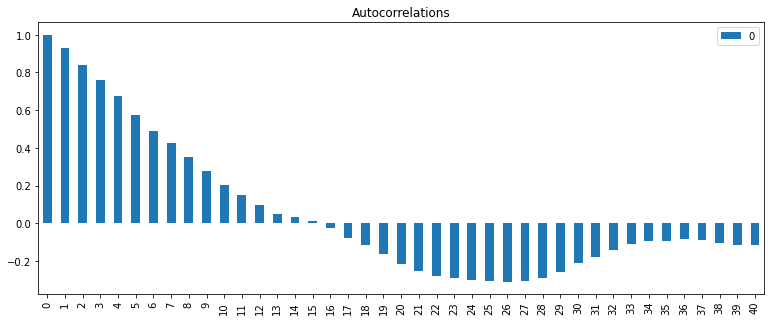

In [0]:
acf = pd.DataFrame(sm.tsa.stattools.acf(data.lrexr))
fig = acf.plot(kind='bar', title='Autocorrelations',figsize=(13,5))


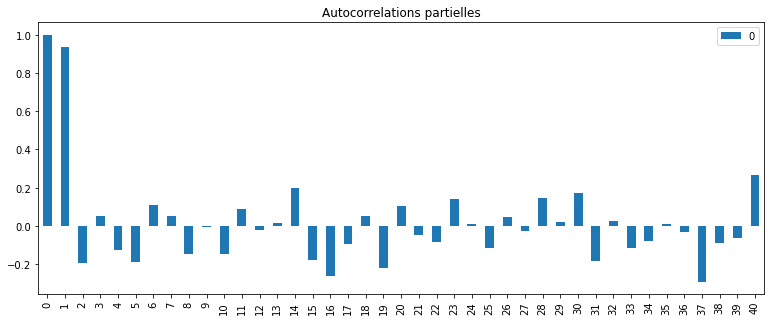

In [0]:
acf = pd.DataFrame(sm.tsa.stattools.pacf(data.lrexr))
fig = acf.plot(kind='bar', title='Autocorrelations partielles',figsize=(13,5))


##Ce graphique confirme la non stationairté de la serie lrexr puisque la chute des auto corrélation est tres lente et que ma jorité des autocorrélations ne sont pas nulles , il convient de différencier la serie (différentiation d'ordre 1) avant de passer le modèle ARIMA

##Différention premiere de la serie lrexr 

In [0]:
diff_lrexr =data.lrexr.diff().dropna()

##calcul des auto corrélation simples et partielle de la serie lrexr différentiée 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


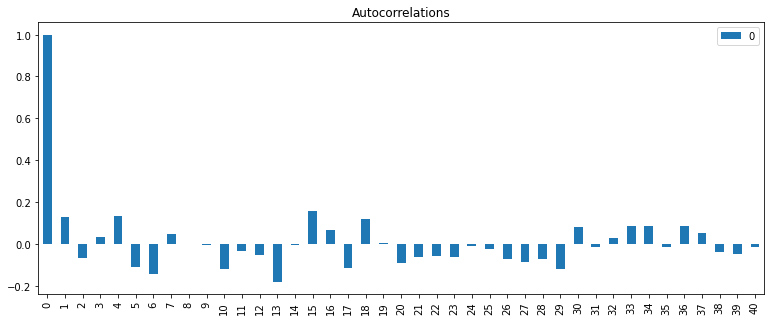

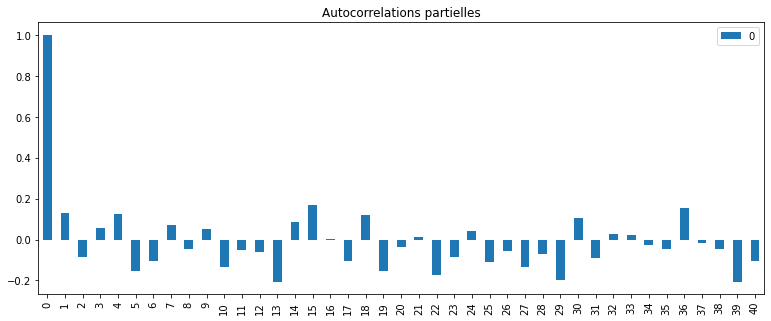

In [0]:
acf = pd.DataFrame(sm.tsa.stattools.acf(diff_lrexr))
fig = acf.plot(kind='bar', title='Autocorrelations',figsize=(13,5))
acf = pd.DataFrame(sm.tsa.stattools.pacf(diff_lrexr))
fig = acf.plot(kind='bar', title='Autocorrelations partielles',figsize=(13,5))


selon l'analyse des auto corrélation, on voit constate que la serie est différentiée est stationnaire.

Cependant, On regardant le graphique des auto corrélation partielles, il est très difficile de d'implémenter modèle ARIMA avec des orders optimaux. Pour ce faire nous allons utiliser le critère de selection de  modèle.

Donc notre on choisira l'AIC  

Selection du meilleur parametre p du modèle AR qui minimise l'AIC. 

Premièrement, nous adaptons un modèle ARIMA (p,1,0). Cela définit la valeur de décalage à p (à trouver) pour l'autorégression, utilise un ordre de différence de 1 pour rendre les séries chronologiques stationnaires et utilise un modèle de moyenne mobile de 0.

In [0]:
from collections import defaultdict
for p in range(1,5):
  dic=defaultdict(list)
  model = ARIMA(diff_lrexr, order=( p ,1,0))
  model_fit= model.fit(disp=0)
  dic[str(p)].append(model_fit.aic)
  print(dic)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/

defaultdict(<class 'list'>, {'1': [-240.01652806837393]})
defaultdict(<class 'list'>, {'2': [-252.696841841462]})
defaultdict(<class 'list'>, {'3': [-261.6600003113668]})


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


defaultdict(<class 'list'>, {'4': [-259.7415952689701]})


#Modèle ARIMA 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.lrexr   No. Observations:                   98
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 135.830
Method:                       css-mle   S.D. of innovations              0.060
Date:                Wed, 15 Apr 2020   AIC                           -261.660
Time:                        14:14:57   BIC                           -248.735
Sample:                    07-31-1973   HQIC                          -256.432
                         - 10-31-1997                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.002     -0.105      0.916      -0.005       0.005
ar.L1.D.lrexr    -0.6542      0.095     -6.874      0.000      -0.841      -0.468
ar.L2.D.lrexr    -0.5463      0.102     

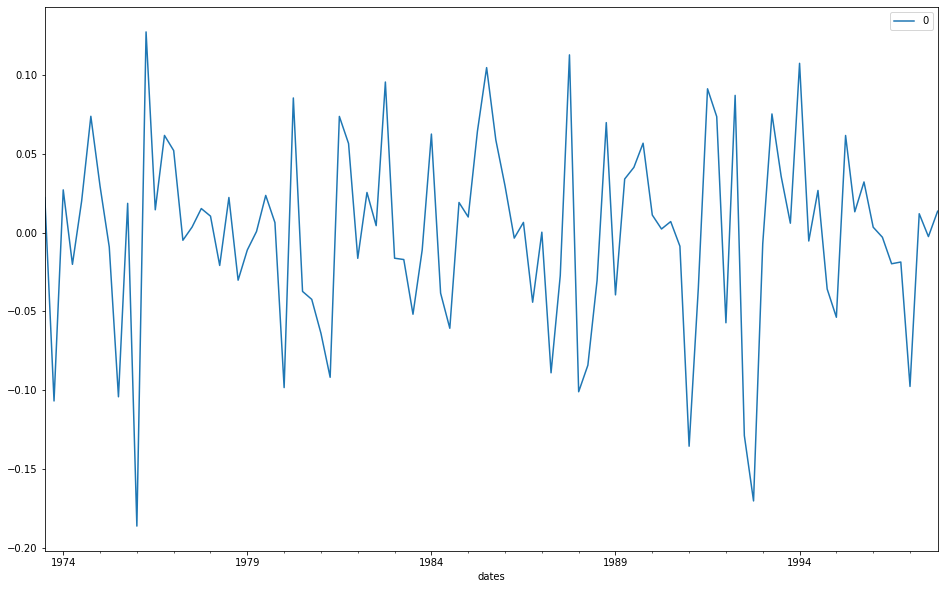

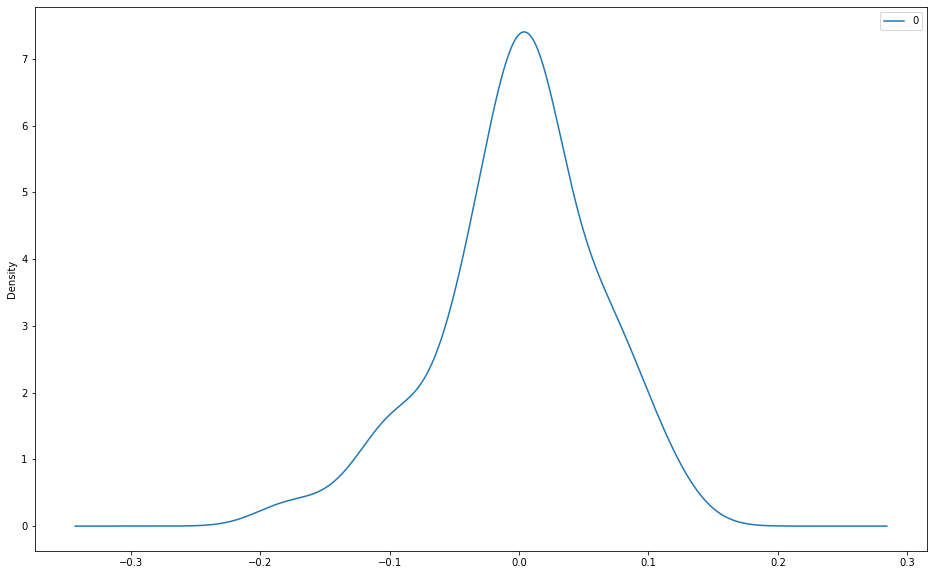

               0
count  98.000000
mean   -0.000371
std     0.060816
min    -0.186281
25%    -0.030305
50%     0.003976
75%     0.031530
max     0.127395
test de shapiro sur la normalité des résidus:
(0.9728127121925354, 0.03968233987689018)


In [0]:
# fit model
model = ARIMA(diff_lrexr, order=(3,1,0))
model_fit= model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
print('test de shapiro sur la normalité des résidus:')
print(shapiro(model_fit.resid))


#Question 4: Prédiction pour les valeurs de la série entre 1998 et 2000 (comprises) à partir du modèle ARIMA Obtenu dans à la question 3 (reponse pas claire j'y reveiendrai plus tard)

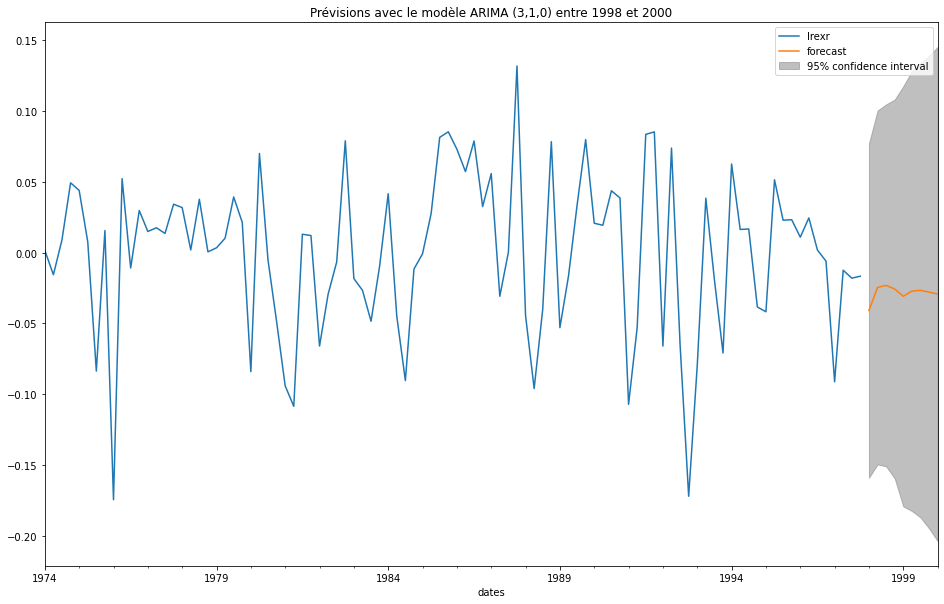

Prévisions entre 1998 et 2000 :


1998-01-31   -0.024268
1998-04-30    0.016294
1998-07-31    0.001491
1998-10-31   -0.002590
1999-01-31   -0.005097
1999-04-30    0.003613
1999-07-31    0.000619
1999-10-31   -0.001361
2000-01-31   -0.001278
Freq: Q-OCT, dtype: float64

In [0]:
fig, ax = plt.subplots()
ax = diff_lrexr.loc['1974':].plot(ax=ax)
fig = model_fit.plot_predict('1998', '2000', dynamic=False, ax=ax,
                        plot_insample= False )
plt.title ( "Prévisions avec le modèle ARIMA (3,1,0) entre 1998 et 2000")
plt.show()

# Le mot clé dynamique affecte la prédiction dans l'échantillon. 
# Si la dynamique est Faux, les valeurs décalées dans l'échantillon sont utilisées pour la prédiction. 
# Si la dynamique est True, les prévisions dans l'échantillon sont utilisées à la place des variables dépendantes décalées. 
# La première valeur de prévision est start .

print ( "Prévisions entre 1998 et 2000 :" )
model_fit.predict('1998', '2000')

#Question 5: test de cointégration des séries LREXR, LUSPROD ,LUSDISRAT , LDISRAT, LTOT ET INTDIFF

***Pour tester la cointégration des variables , nous utiliserons la méthode d’Engle et Granger***

La régression de cointégration est donnée par :
Yt = α + βXt + εt (est cointégrées)

Si  εt est intégré d'ordre 0 I(0) 
et  Yt  et Xt sont I(1)    

Verifions cela

#Etape 1: test de racine unitaire de toutes les séeries
il faut verifier que les serie sont I(1) , pour cela on utilisera le test ADF
Nous avons deja vu dans la question 1 que toutes les series ne sont pas stationnaires. Par conséquent, nous allons directement tester la stationnarité de leur différences premières.

##calcul des différences premieres de toutes les series: nous allons calculé la base de données unique qui continedra que des series différenciées et on l'appelera dif

In [0]:
dif=dat.diff().dropna()

##test ADF modele 3: avec constante et trend

In [0]:
from arch.unitroot import ADF
for i in dif.columns: 
  adf = ADF(dif[i])
  adf.lags = 4
  adf.trend = 'ct'
  print("****************************************************************************************ADF pour la variable", i)
  print( "            "  , i)
  print(adf.summary().as_text())
  reg_res = adf.regression
  print( "                                 "  , i)
  print(reg_res.summary().as_text())

****************************************************************************************ADF pour la variable INTDIFF
             INTDIFF
   Augmented Dickey-Fuller Results   
Test Statistic                 -5.862
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.06 (1%), -3.46 (5%), -3.16 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                                  INTDIFF
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     18.28
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.27e-13
Time:                        15:24

##modèle 2: avec constante et sans trend 

In [0]:
for i in dif.columns: 
  adf = ADF(dif[i])
  adf.lags = 4
  print("****************************************************************************************ADF pour la variable", i)
  print( "            "  , i)
  print(adf.summary().as_text())
  reg_res = adf.regression
  print( "                                 "  , i)
  print(reg_res.summary().as_text())

****************************************************************************************ADF pour la variable INTDIFF
             INTDIFF
   Augmented Dickey-Fuller Results   
Test Statistic                 -5.877
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                                  INTDIFF
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     22.09
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           2.81e-14
Time:                        15:31:11   Log-Likelihood: 

##modele1: sans constante sans **trend**

In [0]:


variable = [ ]
Statistique_test = []
seuil_1 = []
seuil_5 = []
seuil_10 = []
Conclusion = []


for i in dif.columns:
  modele1=sm.tsa.stattools.adfuller(dif[i] , maxlag=4, regression='nc', autolag='AIC', store=False, regresults=False)
  print('Statistique du test ADF:', modele1[:1])
  print(modele1[4])

  
  variable.append ( i )
  Statistique_test.append ( modele1[:1][0] )
  seuil_1.append (modele1[4]['1%'] )
  seuil_5.append (modele1[4]['5%'] )
  seuil_10.append (modele1[4]['10%'] )

  if modele1[4]['5%']< modele1[:1]:
    print ("on constate que le t calculé est supérieur a la valeur critique au seuil de 5%, Alors la saerie ", i, "est non stationnaire sans trend sans constante")
    Conclusion.append ( "t supérieur a la valeur critique au seuil de 5%")

  else: 
      print ("on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la saerie ", i, "est  stationnaire sans trend sans constante")
      Conclusion.append ( "t inferieur a la valeur critique au seuil de 5%")




result = pd.DataFrame( { "variable" : variable , "Statistique_test" : Statistique_test , 
                      "seuil_1%" : seuil_1 , "seuil_5%" : seuil_5 , "seuil_10%" : seuil_10 ,
                      "Conclusion" : Conclusion } ) 

result

Statistique du test ADF: (-7.739117041043604,)
{'1%': -2.589676620498615, '5%': -1.9441638046362444, '10%': -1.6142953474267385}
on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la saerie  INTDIFF est  stationnaire sans trend sans constante
Statistique du test ADF: (-8.648679291946943,)
{'1%': -2.5889319408579756, '5%': -1.9440580172802149, '10%': -1.6143654377002778}
on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la saerie  lrexr est  stationnaire sans trend sans constante
Statistique du test ADF: (-4.097703175283583,)
{'1%': -2.589676620498615, '5%': -1.9441638046362444, '10%': -1.6142953474267385}
on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la saerie  lusprod est  stationnaire sans trend sans constante
Statistique du test ADF: (-8.879721315555651,)
{'1%': -2.5889319408579756, '5%': -1.9440580172802149, '10%': -1.6143654377002778}
on constate que le t calculé est infé

,variable,Statistique_test,seuil_1%,seuil_5%,seuil_10%,Conclusion
0,INTDIFF,-7.739117,-2.589677,-1.944164,-1.614295,t inferieur a la valeur critique au seuil de 5%
1,lrexr,-8.648679,-2.588932,-1.944058,-1.614365,t inferieur a la valeur critique au seuil de 5%
2,lusprod,-4.097703,-2.589677,-1.944164,-1.614295,t inferieur a la valeur critique au seuil de 5%
3,lusdisrat,-8.879721,-2.588932,-1.944058,-1.614365,t inferieur a la valeur critique au seuil de 5%
4,ldisrat,-7.716818,-2.589423,-1.944128,-1.614319,t inferieur a la valeur critique au seuil de 5%
5,ltot,-5.882989,-2.589423,-1.944128,-1.614319,t inferieur a la valeur critique au seuil de 5%


On constate que toutes les series différenciées sont stationnaire alors elles sont intégrées d'ordre 1

##Etape 2: Estimation par les MCO, la relation de long terme 
LREXRt =
β0 + β1
LUSPRODt + β2
LUSD ISRATt + β3
LD ISRATt
+β4
LTOTt + β5
INTD IFFt + εt


In [0]:
X=dif[['INTDIFF',  'lusprod', 'lusdisrat', 'ldisrat', 'ltot']]
X = sm.tools.tools.add_constant(X)
cointegration=sm.OLS(dif.lrexr,X)
dif = sm.add_constant(dif)
results = cointegration.fit()

In [0]:
print(results.summary(cointegration))

                                                    OLS Regression Results                                                    
Dep. Variable:     <statsmodels.regression.linear_model.OLS object at 0x7fe119e0e470>   R-squared:                       0.138
Model:                                                                            OLS   Adj. R-squared:                  0.092
Method:                                                                 Least Squares   F-statistic:                     2.976
Date:                                                                Wed, 15 Apr 2020   Prob (F-statistic):             0.0155
Time:                                                                        17:34:09   Log-Likelihood:                 151.49
No. Observations:                                                                  99   AIC:                            -291.0
Df Residuals:                                                                      93   BIC:                   

##Etape 3: Test deracine unitaire sur les résidus
pour la relation soit cointégrée, les résidus doivent etre  I(0) .

Récuperation des residus du modele

In [0]:
residus=results.resid

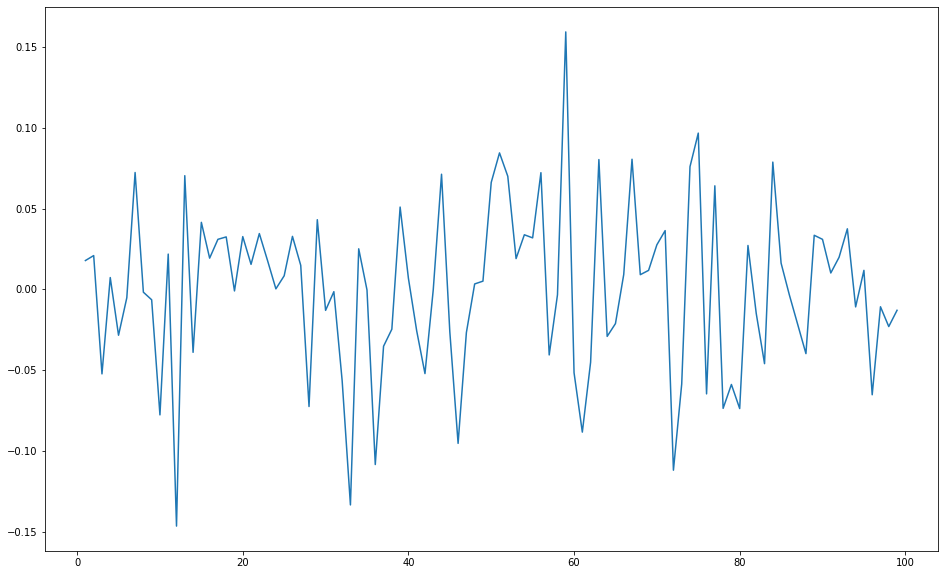

In [0]:
plt.plot(residus)

##modele 3: constante et trend


In [0]:
 
adf = ADF(residus)
adf.lags = 4
adf.trend = 'ct'
print('signifcativité du trend des résidus')
print(adf.summary().as_text())
reg_res = adf.regression
print( "                    Significativité du trend des résidus" )
print(reg_res.summary().as_text())

signifcativité du trend des résidus
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.065
P-value                         0.007
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.06 (1%), -3.46 (5%), -3.16 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                    Significativité du trend des résidus
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     15.77
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           3.58e-12
Time:                        17:36:30   Log-Likelihood:                 144.33
No. Observations:                  94   AI

##Model 2: constant sans trend

In [0]:

adf = ADF(residus)
adf.lags = 4
print(adf.summary().as_text())
reg_res = adf.regression
print( "                  Significativité de la constante des résidus" )
print(reg_res.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.106
P-value                         0.001
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                  Significativité de la constante des résidus
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     19.14
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           7.68e-13
Time:                        17:40:21   Log-Likelihood:                 144.33
No. Observations:                  94   AIC:                            -276.7
Df Residuals:   

##model 1: sans constante sans trend

In [0]:
modele1=sm.tsa.stattools.adfuller(residus , maxlag=4, regression='nc', autolag='AIC', store=False, regresults=False)
print('Statistique du test ADF:', modele1[:1])
print(modele1[4])
if modele1[4]['5%']< modele1[:1]:
  print ("on constate que le t calculé est supérieur a la valeur critique au seuil de 5%, Alors la saerie des résidus est non stationnaire sans trend sans constante")
else: 
      print ("on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la saerie des résidus est  stationnaire sans trend sans constante")

Statistique du test ADF: (-9.856329220838104,)
{'1%': -2.5889319408579756, '5%': -1.9440580172802149, '10%': -1.6143654377002778}
on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la saerie des résidus est  stationnaire sans trend sans constante


##on on a vu que les serie différenciees sont stationnaire d'orde 1, nous avons fait la regression des MCO , nous avons recuperé les residus et nous avons tester la presence d'une racine unitaire cette serie.
##nous constaté qu"il n'y a pas de racine unitaire dans la serie des residus alors les residus sont intégrés à d'ordre 2.
#Conclusion: les serie sont cointégrées.

#Question 6: Estimation avec votre logiciel cette/ces relation(s) de cointégration. Compa-
#rer avec (1).

In [0]:
valeur_estimes=results.fittedvalues

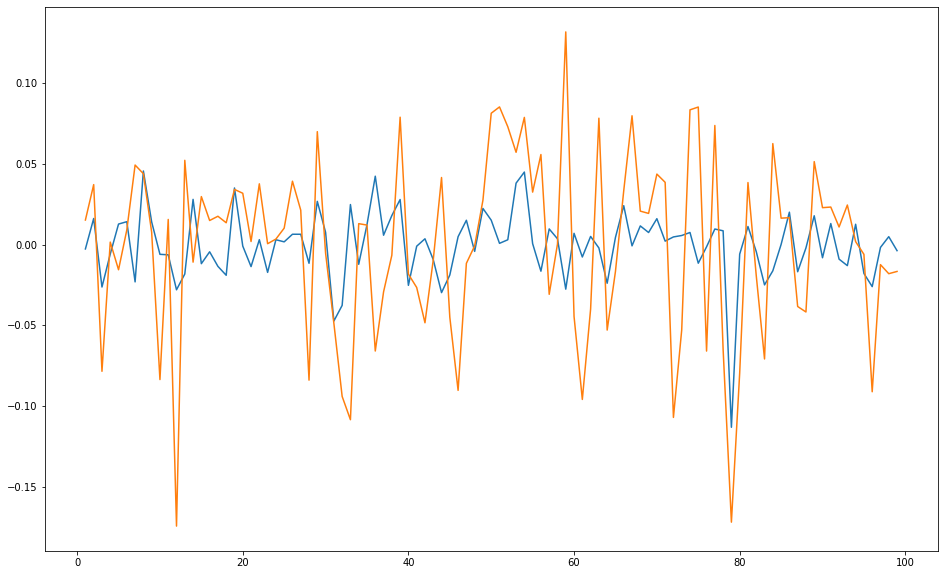

In [0]:
plt.plot(valeur_estimes)
plt.plot(dif.lrexr)

##Exercice 2: Etude d’une série temporelle

In [0]:
from google.colab import files
uploaded = files.upload()

Saving valeurs.xls to valeurs (2).xls


In [0]:
import io
data2 = pd.read_excel(io.BytesIO(uploaded['valeurs.xls']))
data2.head( 5 )

,Année,Trimestre,NpdC,IdF,Tot
0,1982,1,9.0,5.6,6.7
1,1982,2,9.0,5.6,6.8
2,1982,3,9.1,5.6,7.0
3,1982,4,8.9,5.5,7.0
4,1983,1,9.0,5.6,7.0


In [0]:
pd.DataFrame(data= data2.isnull().sum())

,0
Année,0
Trimestre,0
NpdC,0
IdF,0
Tot,0


In [0]:

data2.describe()

,Année,Trimestre,NpdC,IdF,Tot
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,1997.253968,2.484127,12.156349,7.843651,8.917460
std,9.131866,1.122384,1.449275,1.127794,1.036076
min,1982.000000,1.000000,8.900000,5.500000,6.700000
25%,1989.250000,1.250000,11.300000,6.900000,8.100000
50%,1997.000000,2.000000,11.900000,7.850000,8.900000
75%,2005.000000,3.000000,13.150000,8.800000,9.600000
max,2013.000000,4.000000,14.900000,9.700000,10.800000


In [0]:
data2["dates"] = pd.date_range( start = '1/1/1982' ,  end='6/1/2013',  freq='3M')
data2.set_index('dates', inplace = True )
data2.head()

,Année,Trimestre,NpdC,IdF,Tot
dates,,,,,
1982-01-31,1982,1,9.0,5.6,6.7
1982-04-30,1982,2,9.0,5.6,6.8
1982-07-31,1982,3,9.1,5.6,7.0
1982-10-31,1982,4,8.9,5.5,7.0
1983-01-31,1983,1,9.0,5.6,7.0


#**Partie A**

#Question 1: Tracage du graphe de la série NpdC. Présentez quelques statistiques simples qui vous semblent utiles à présenter.

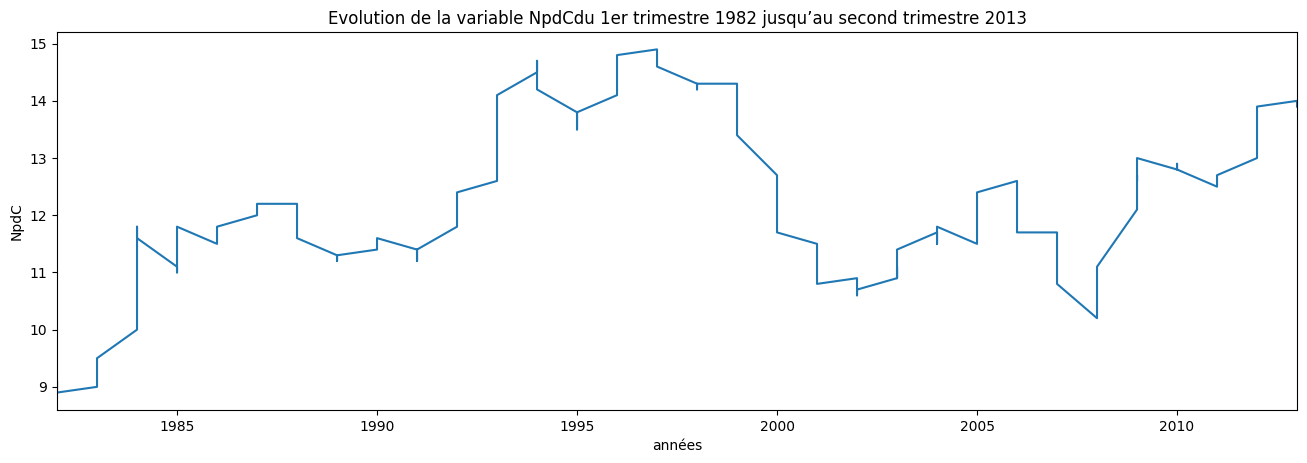

In [0]:
y=data2.Année

plt.figure( figsize=(16,5), dpi= 100)
plt.plot(y, data2.NpdC )
plt.gca().set(title= "Evolution de la variable " + data2.NpdC.name + "du 1er trimestre 1982 jusqu’au second trimestre 2013" )
plt.xlabel('années', size=10)
plt.ylabel( data2.NpdC.name , size=10)
plt.xlim( y.min() , y.max()  )
plt.show()

Quelques statistiques descriptives 

In [0]:
pd.DataFrame(data=data2.NpdC.describe())

,NpdC
count,126.000000
mean,12.156349
std,1.449275
min,8.900000
25%,11.300000
50%,11.900000
75%,13.150000
max,14.900000


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


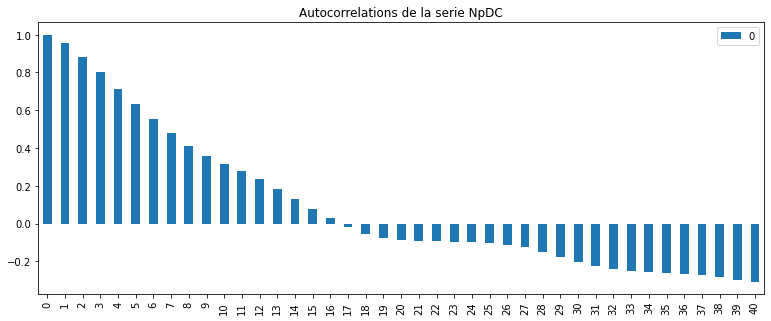

In [0]:
acf = pd.DataFrame(sm.tsa.stattools.acf(data2.NpdC))
fig = acf.plot(kind='bar', title='Autocorrelations de la serie NpDC',figsize=(13,5))

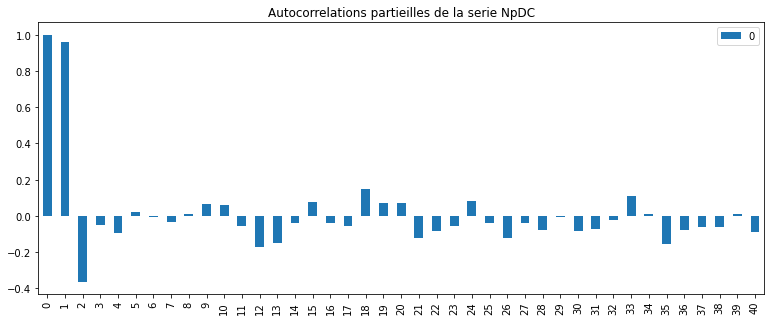

In [0]:
acf = pd.DataFrame(sm.tsa.stattools.pacf(data2.NpdC))
fig = acf.plot(kind='bar', title='Autocorrelations partieilles de la serie NpDC',figsize=(13,5))

#Question 2: Teste d'intégration de la serie et estimation d'un modèle ARIMA qui pourrait décrire les données. 

## en analysant le graphe d'auto corrélation, on constate que la chute d'auto corrélation est très lente et elles sont à majorité significativement différent de 0 ce qui traduit la non stationnarité donc la serie n'est pas intégrée à l'orgre 0. Teston alors la stationnarité de sa difference 1ere.

# Tetst d'intégration de la serie NpdC
Nous utiliserons le test de la recine unitaire ADF

##modele3

In [0]:
adf = ADF(data2.NpdC)
adf.lags = 12
adf.trend = 'ct'
print('signifcativité du trend')
print(adf.summary().as_text())
reg_res = adf.regression
print(reg_res.summary().as_text())

signifcativité du trend
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.618
P-value                         0.272
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.04 (1%), -3.45 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     4.509
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           3.35e-06
Time:                        04:51:41   Log-Likelihood:                 9.6462
No. Observations:                 113   AIC:                             10.71
Df Residuals:                   

##modele2

In [0]:

adf = ADF(data2.NpdC)
adf.lags = 12
print(adf.summary().as_text())
reg_res = adf.regression
print(reg_res.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.632
P-value                         0.087
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     4.902
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.47e-06
Time:                        04:51:41   Log-Likelihood:                 9.6291
No. Observations:                 113   AIC:                             8.742
Df Residuals:                      99   BIC:                             46.93

# Différenciation de la serie

In [0]:
NPdC_dif=data2.NpdC.diff().dropna()

##Test ADF

modele3: trend plus constante

In [0]:
adf = ADF(NPdC_dif)
adf.lags = 12
adf.trend = 'ct'
print('signifcativité du trend')
print(adf.summary().as_text())
reg_res = adf.regression
print(reg_res.summary().as_text())

signifcativité du trend
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.400
P-value                         0.380
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.04 (1%), -3.45 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     2.799
Date:                Wed, 15 Apr 2020   Prob (F-statistic):            0.00154
Time:                        04:51:41   Log-Likelihood:                 5.8037
No. Observations:                 112   AIC:                             18.39
Df Residuals:                   

modele2: sans trend avec constante

In [0]:

adf = ADF(NPdC_dif)
adf.lags = 12
print(adf.summary().as_text())
reg_res = adf.regression
print(reg_res.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.446
P-value                         0.129
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3.045
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           0.000835
Time:                        04:51:41   Log-Likelihood:                 5.8033
No. Observations:                 112   AIC:                             16.39
Df Residuals:                      98   BIC:                             54.45

modele1: test de racine unitaire (sans  trend sans constante)

In [0]:
modele1=sm.tsa.stattools.adfuller(NPdC_dif , maxlag=4, regression='nc', autolag='AIC', store=False, regresults=False)
print('Statistique du test ADF:', modele1[:1])
print(modele1[4])
if modele1[4]['5%']< modele1[:1]:
  print ("on constate que le t calculé est supérieur a la valeur critique au seuil de 5%, Alors la saerie NPdC différenciée est non stationnaire sans trend sans constante")
else: 
      print ("on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la saerie NPdC différenciée est  stationnaire sans trend sans constante")

Statistique du test ADF: (-5.907268731165705,)
{'1%': -2.5840065322580643, '5%': -1.9433686005211306, '10%': -1.6148412702661876}
on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la saerie NPdC différenciée est  stationnaire sans trend sans constante


##En faisant le test de présence de racine unitaire pour la serie NPdC différencié, on s'apparçoit qu'elle n'admet pas de racine unitaire sans trend et sans constante. Alors la serie est intégrée d'ordre 1 ou I(1).



##Selection des parametre p optimaux pour ARIMA(p,1,O)

#Vu que notre modèle est stationnaire , la reparésentation des autocéralions n'est plus utile, nous alllons direcetemenet analyser les aucorrélation partielle



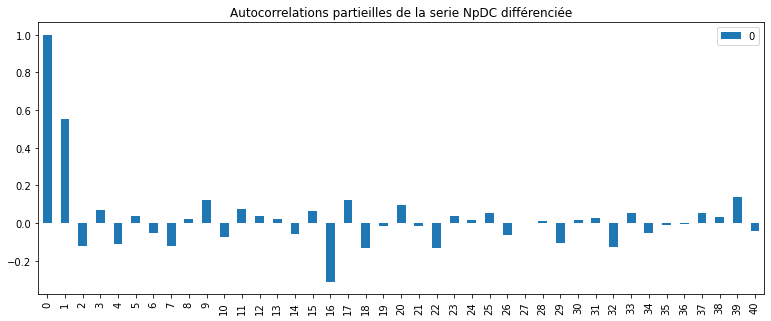

In [0]:
acf = pd.DataFrame(sm.tsa.stattools.pacf(NPdC_dif))
fig = acf.plot(kind='bar', title='Autocorrelations partieilles de la serie NpDC différenciée',figsize=(13,5))

In [0]:
from collections import defaultdict
for p in range(1,5):
  dic=defaultdict(list)
  model = ARIMA(NPdC_dif, order=( p ,1,0))
  model_fit= model.fit(disp=0)
  dic[str(p)].append(model_fit.aic)
  print(dic)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/

defaultdict(<class 'list'>, {'1': [47.44406662081593]})
defaultdict(<class 'list'>, {'2': [39.7211778539247]})
defaultdict(<class 'list'>, {'3': [41.0856247867643]})
defaultdict(<class 'list'>, {'4': [38.1828795509374]})


##Estimation du modele ARIMA

                             ARIMA Model Results                              
Dep. Variable:                 D.NpdC   No. Observations:                  124
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 -13.091
Method:                       css-mle   S.D. of innovations              0.269
Date:                Wed, 15 Apr 2020   AIC                             38.183
Time:                        04:51:42   BIC                             55.105
Sample:                    07-31-1982   HQIC                            45.057
                         - 04-30-2013                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0005      0.013      0.036      0.971      -0.025       0.026
ar.L1.D.NpdC    -0.1990      0.088     -2.258      0.026      -0.372      -0.026
ar.L2.D.NpdC    -0.3437      0.090     -3.83

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


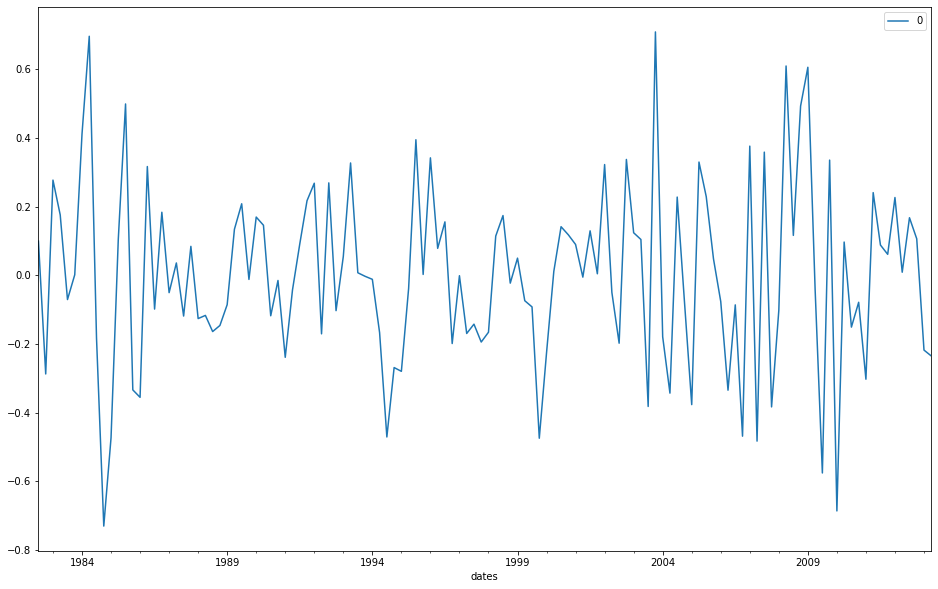

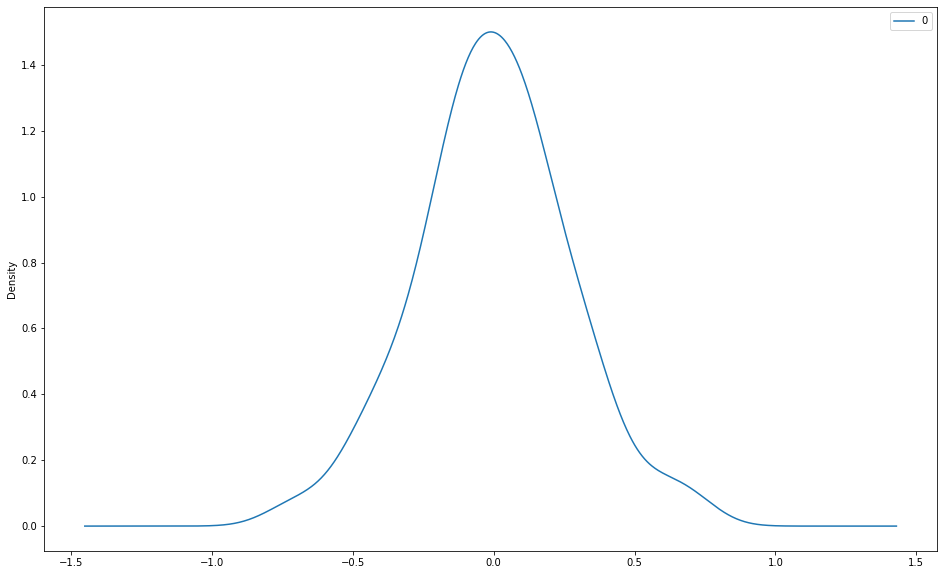

                0
count  124.000000
mean     0.000208
std      0.269859
min     -0.730928
25%     -0.166313
50%     -0.002148
75%      0.158594
max      0.709183
test de shapiro sur la normalité des résidus:
(0.9926486611366272, 0.7625820636749268)


In [0]:
# fit model
model = ARIMA(NPdC_dif, order=(4,1,0))
model_fit= model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
print('test de shapiro sur la normalité des résidus:')
print(shapiro(model_fit.resid))


#Question 3: Prévisions jusqu’à l’année 2015 à l'aide du modèle ARIMA (a revoir)

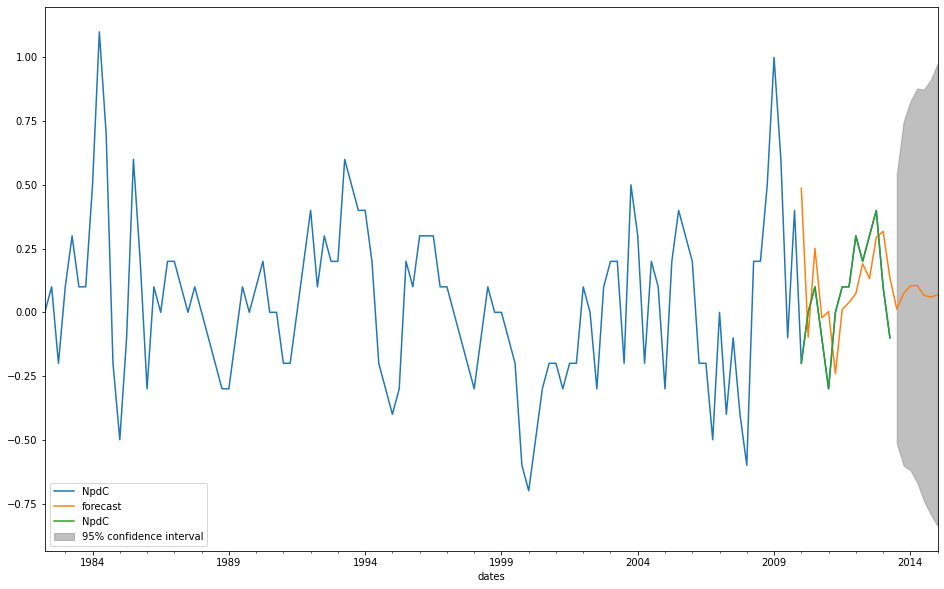

In [0]:
fig, ax = plt.subplots()
ax = NPdC_dif.loc['1982':].plot(ax=ax)
fig = model_fit.plot_predict('2010', '2015', dynamic=False, ax=ax,
                        plot_insample= True)
plt.show()

#**Partie B**

##Question1: Tracage sur un même graphique des courbes de chômage dans le Nord-Pas-de-Calais, en Ile-de-France et dans toute la France

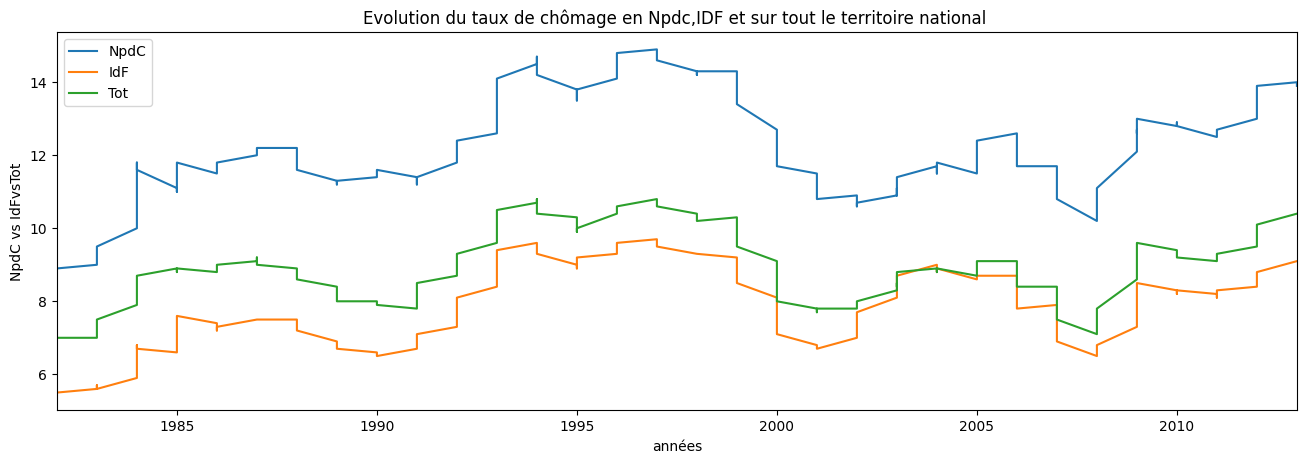

In [0]:
y=data2.Année

plt.figure( figsize=(16,5), dpi= 100)
p1 = plt.plot(y, data2.NpdC )
p2 = plt.plot(y, data2.IdF )
p3 = plt.plot(y, data2.Tot )

plt.gca().set(title= "Evolution du taux de chômage en Npdc,IDF et sur tout le territoire national " )

plt.xlabel('années', size=10)
plt.ylabel( data2.NpdC.name + " vs " + data2.IdF.name +"vs"  +data2.Tot.name , size=10)
plt.legend(( p1[0],  p2[0], p3[0] ), ('NpdC', 'IdF', 'Tot'))
plt.xlim( y.min() , y.max()  )
plt.show()

In [0]:
NpdC_IdF_Tot=data2[['NpdC', 'IdF', 'Tot' ]]

In [0]:
NpdC_IdF_Tot.describe()

,NpdC,IdF,Tot
count,126.000000,126.000000,126.000000
mean,12.156349,7.843651,8.917460
std,1.449275,1.127794,1.036076
min,8.900000,5.500000,6.700000
25%,11.300000,6.900000,8.100000
50%,11.900000,7.850000,8.900000
75%,13.150000,8.800000,9.600000
max,14.900000,9.700000,10.800000


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


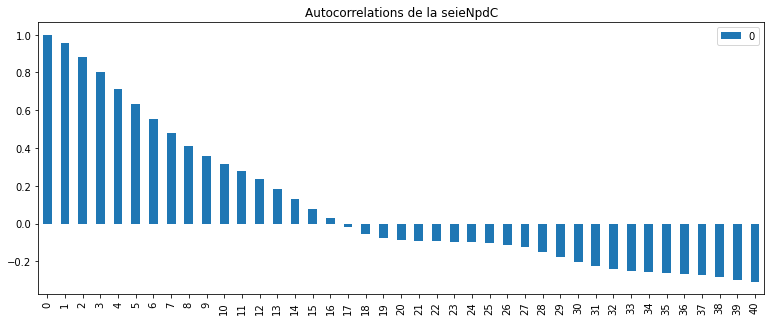

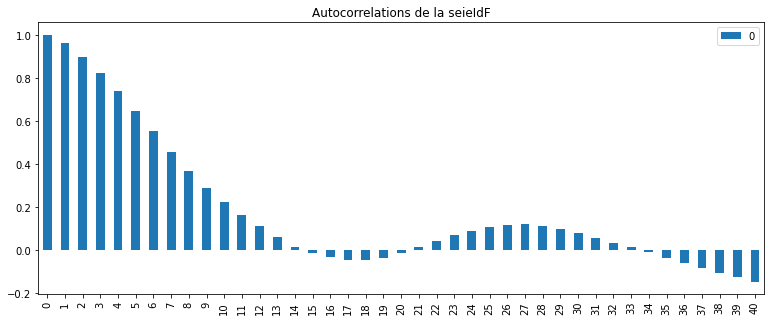

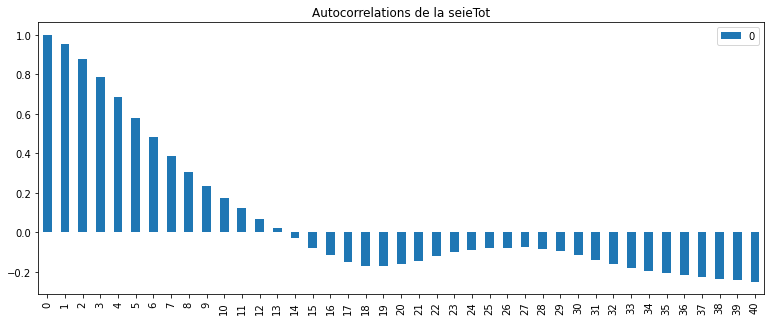

In [0]:
for i in NpdC_IdF_Tot.columns:
  acf = pd.DataFrame(sm.tsa.stattools.acf(NpdC_IdF_Tot[i]))
  fig = acf.plot(kind='bar', title='Autocorrelations de la seie' +  i ,figsize=(13,5))

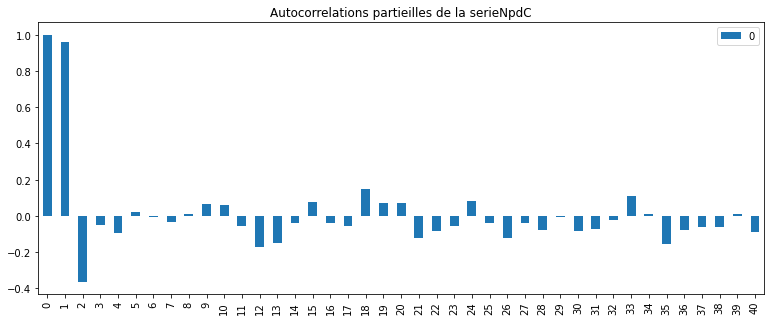

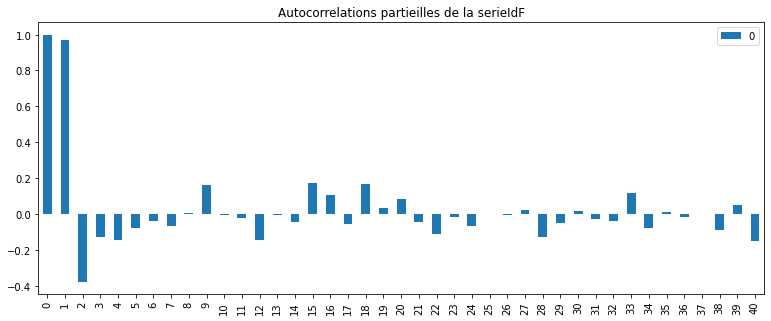

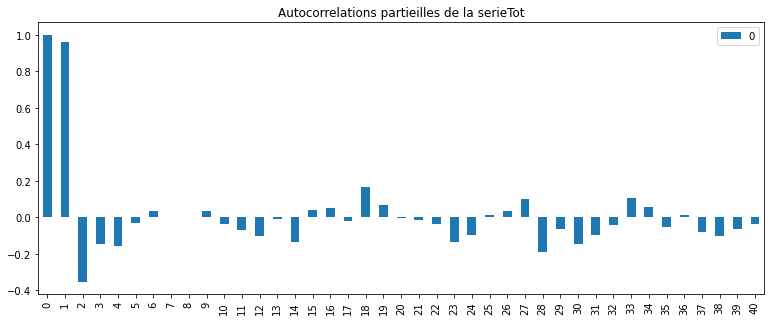

In [0]:
for i in NpdC_IdF_Tot.columns:
  acf = pd.DataFrame(sm.tsa.stattools.pacf(NpdC_IdF_Tot[i]))
  fig = acf.plot(kind='bar', title='Autocorrelations partieilles de la serie'+i ,figsize=(13,5))

##Question2:Tester la cointégration de ces séries. Quelle serait la relation de cointégration si on travaillait avec des tests au seuil 10% ?

Comme vu plsu haut, nous utiliserons la méthode d’Engle et Granger

##Etape 1: En analysant les graphique des auto corrélation de ces trois serie ont constate que elles ne sont pas I(0).
##Alors testons la stationnaité de leurs différences premières 

In [0]:
NpdC_IdF_Tot_dif=NpdC_IdF_Tot.diff()

##modele3: avec constante et trend

In [0]:
for i in NpdC_IdF_Tot.columns:
  adf = ADF(NpdC_IdF_Tot[i])
  adf.lags = 12
  adf.trend = 'ct'
  print('signifcativité du trend pour la viable' + i)
  print(adf.summary().as_text())
  reg_res = adf.regression
  print(reg_res.summary().as_text())

signifcativité du trend pour la viableNpdC
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.618
P-value                         0.272
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.04 (1%), -3.45 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     4.509
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           3.35e-06
Time:                        04:51:47   Log-Likelihood:                 9.6462
No. Observations:                 113   AIC:                             10.71
Df Residuals:

##Modele2: sans trend avec constante

In [0]:
for i in NpdC_IdF_Tot.columns:
  adf = ADF(NpdC_IdF_Tot[i])
  adf.lags = 12
  print("significativité de la constante pour la serie" + i)
  print(adf.summary().as_text())
  reg_res = adf.regression
  print(reg_res.summary().as_text())

significativité de la constante pour la serieNpdC
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.632
P-value                         0.087
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     4.902
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.47e-06
Time:                        04:51:47   Log-Likelihood:                 9.6291
No. Observations:                 113   AIC:                             8.742
Df Residuals:               

##Modele 1: sans trend sans constante 

###Conclusion: les series des différtences premières de NpdC, IdF, Tot ne sont pas intégrées.Alors elles ne sont pas cointégrées. 

##Question3: En l’absence de cointégration, on considère le modèle VAR multivarié.
#Réaliser l’estimation de ce modèle en justifiant bien comment choisir entre les différents modèles possibles.

##on a vu que les series des différences premieres non sont pas significatives alors testos les 2 ieme différence

##Différence deuxième des series

In [0]:
NpdC_dif_2nd=NpdC_IdF_Tot_dif.diff().dropna()

#Testons les stationnairté des series de deuxoème différences
##Nous allons utiliser le test de racine unitaire ADF
##modele3

In [0]:
for i in NpdC_dif_2nd.columns:
  adf = ADF(NpdC_dif_2nd[i])
  adf.lags = 12
  adf.trend = 'ct'
  print('signifcativité du trend pour la serie '+i)
  print(adf.summary().as_text())
  reg_res = adf.regression
  print(reg_res.summary().as_text())

signifcativité du trend pour la serie NpdC
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.744
P-value                         0.001
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.04 (1%), -3.45 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     17.08
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           3.10e-20
Time:                        04:51:47   Log-Likelihood:                 6.7755
No. Observations:                 111   AIC:                             16.45
Df Residuals:

##modele2: sans trend avec constante

In [0]:
for i in NpdC_dif_2nd.columns:
  adf = ADF(NpdC_dif_2nd[i])
  adf.lags = 12
  print("siginificativité de la constante pour la serie"+i)
  print(adf.summary().as_text())
  reg_res = adf.regression
  print(reg_res.summary().as_text())

siginificativité de la constante pour la serieNpdC
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.680
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     18.39
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           9.95e-21
Time:                        04:51:48   Log-Likelihood:                 6.3533
No. Observations:                 111   AIC:                             15.29
Df Residuals:              

##modele 1: sans trend sans constante

In [0]:
for i in NpdC_dif_2nd.columns:
  modele1=sm.tsa.stattools.adfuller(NpdC_dif_2nd[i], maxlag=12, regression='nc', autolag='AIC', store=False, regresults=False)
  print('Statistique du test ADF:', modele1[:1])
  print(modele1[4])
  if modele1[4]['10%']< modele1[:1]:
    print ("on constate que le t calculé est supérieur a la valeur critique au seuil de 5%, Alors la serie " + i + " de différence deuxième  est non stationnaire ")
  else: 
        print ("on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la serie" + i + " de différence deuxième  est  stationnaire ")

Statistique du test ADF: (-7.0752512531763205,)
{'1%': -2.585283683115339, '5%': -1.9435455883031285, '10%': -1.6147157895977695}
on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la serieNpdC de différence deuxième  est  stationnaire 
Statistique du test ADF: (-5.554762129125711,)
{'1%': -2.5854559924385634, '5%': -1.9435695648886333, '10%': -1.6146989749321936}
on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la serieIdF de différence deuxième  est  stationnaire 
Statistique du test ADF: (-5.862341990823434,)
{'1%': -2.5856313665743307, '5%': -1.9435939915385572, '10%': -1.6146818889482863}
on constate que le t calculé est inférieur a la valeur critique au seuil de 5%, Alors la serieTot de différence deuxième  est  stationnaire 


## les series  de deuxièmes différences des series NpdC, IdF, Tot sont stationnaire nous pouvons alors implémenter notre modele VAR(p)


## Rechercons du p optimal
##nous allons chercher le p minimise l'AIC

In [0]:
for p in range(1,4):
  dic=defaultdict(list)
  model = VAR(NpdC_dif_2nd)
  results=model.fit(p)
  dic[str(p)].append(results.aic)
  print(dic)

defaultdict(<class 'list'>, {'1': [-10.605087707594553]})
defaultdict(<class 'list'>, {'2': [-10.844961180931799]})
defaultdict(<class 'list'>, {'3': [-10.970691709176206]})


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


## Nous avons choisi p=3 car il est associé au plus fait AIC

In [0]:
model = VAR(NpdC_dif_2nd)
results=model.fit(3)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Apr, 2020
Time:                     04:51:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -10.2775
Nobs:                     121.000    HQIC:                  -10.6892
Log likelihood:           178.652    FPE:                1.72180e-05
AIC:                     -10.9707    Det(Omega_mle):     1.35682e-05
--------------------------------------------------------------------
Results for equation NpdC
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.001228         0.024026            0.051           0.959
L1.NpdC        -0.082132         0.151742           -0.541           0.588
L1.IdF         -0.367606         0.217345           -1.691           0.091
L1.Tot    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


##Question 4: Réaliser des prévisions jusqu’à l’année 2016. Comparer avec le fait de faire des prévisions en utilisant l’analyse univarée de la partie A. Commenter.

In [0]:
NpdC_dif_2nd['year']=data2['Année']
NpdC_dif_2nd.set_index('year', inplace = True )

In [0]:
lag_order = results.k_ar
results.forecast(NpdC_dif_2nd.values[-lag_order:], 3)

array([[ 0.31011267,  0.2034684 ,  0.17151194],
       [ 0.00419169, -0.00856805, -0.03437325],
       [-0.16798545, -0.08045928, -0.02568054]])

Cours de prévision des variablesTot


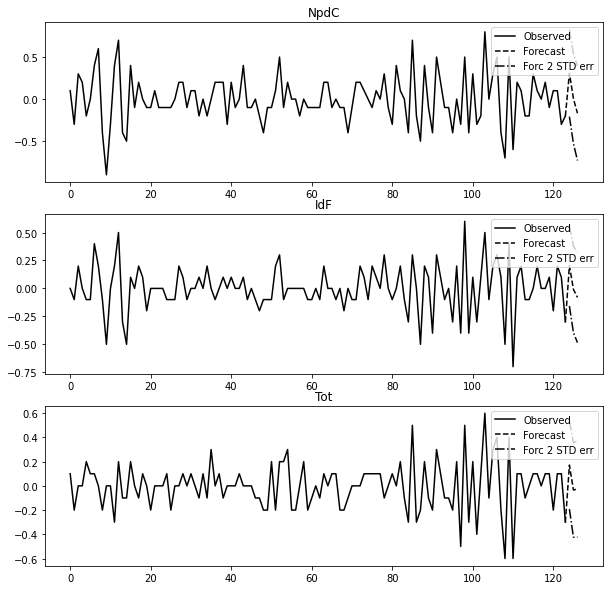

In [0]:
print('Cours de prévision des variables' + i)
results.plot_forecast(3)
plt.show()

In [0]:
predi=results.forecast(NpdC_dif_2nd.values[-lag_order:], 3)
predi_table=pd.DataFrame(data=predi, columns=NpdC_dif_2nd.columns)
liste=[2014, 2015 , 2016]
predi_table['year']=liste
predi_table.set_index('year', inplace = True )

In [0]:
print("Table de prévision pour les années 2014, 2015 et 2016")
predi_table

Table de prévision pour les années 2014, 2015 et 2016


,NpdC,IdF,Tot
year,,,
2014,0.310113,0.203468,0.171512
2015,0.004192,-0.008568,-0.034373
2016,-0.167985,-0.080459,-0.025681
